In [1]:
import pandas as pd
import seaborn as sns
import numpy as np 
import re
import matplotlib.pyplot as plt
import dill
from operator import itemgetter

In [2]:
## loading studies

dict_studies = dill.load(open('dict_studies.pkd', 'rb'))

In [4]:
def median(lst):
    n = len(lst)
    s = sorted(lst)
    return (sum(s[n//2-1:n//2+1])/2.0, s[n//2])[n % 2] if n else None

936

In [123]:
dict_studies[505].get('design_groups')

In [22]:
## pending_results, design_groups and reported_events

In [118]:
## Reported Events

report_events = list(map(itemgetter('reported_events'), dict_studies))
actual_events = list(filter(None, report_events))
len(actual_events)
print("Studies with reported events: "+ str(len(actual_events)))

len_studies = list(map(lambda x: len(x),actual_events))
avg_reported_events = round(sum(len_studies)/len(len_studies),0)

print("Mean: "+str(avg_reported_events)+ "  Max: "+ str(max(len_studies))+ "  Min: "+ str(min(len_studies)) + "  Median: " + str(median(len_studies)))

Studies with reported events: 429
Mean: 481.0  Max: 9768  Min: 3  Median: 270


In [231]:
df_reported_events = (pd.DataFrame(report_events)).dropna(thresh=1)
# .fillna(0)
# df_reported_events['events'] = df_reported_events.values.tolist()
df_reported_events.head()

,0,1,2,3,4,5,6,7,8,9,...,9758,9759,9760,9761,9762,9763,9764,9765,9766,9767
30,{'adverse_event_term': 'Superior vena caval oc...,{'adverse_event_term': 'Superior vena caval oc...,"{'adverse_event_term': 'Aortic stenosis', 'sub...","{'adverse_event_term': 'Aortic stenosis', 'sub...","{'adverse_event_term': 'Erythema', 'subjects_a...","{'adverse_event_term': 'Erythema', 'subjects_a...","{'adverse_event_term': 'Drug eruption', 'subje...","{'adverse_event_term': 'Drug eruption', 'subje...","{'adverse_event_term': 'Respiratory failure', ...","{'adverse_event_term': 'Respiratory failure', ...",...,None,None,None,None,None,None,None,None,None,None
45,"{'adverse_event_term': 'Hypotension', 'subject...","{'adverse_event_term': 'Deep vein thrombosis',...","{'adverse_event_term': 'Circulatory collapse',...","{'adverse_event_term': 'Respiratory failure', ...","{'adverse_event_term': 'Respiratory distress',...","{'adverse_event_term': 'Respiratory arrest', '...","{'adverse_event_term': 'Pulmonary oedema', 'su...","{'adverse_event_term': 'Pulmonary embolism', '...","{'adverse_event_term': 'Pneumothorax', 'subjec...","{'adverse_event_term': 'Pleural effusion', 'su...",...,None,None,None,None,None,None,None,None,None,None
47,"{'adverse_event_term': 'Respiratory distress',...","{'adverse_event_term': 'Pleural effusion', 'su...","{'adverse_event_term': 'Dyspnoea', 'subjects_a...",{'adverse_event_term': 'Chronic obstructive pu...,{'adverse_event_term': 'Acute respiratory fail...,"{'adverse_event_term': 'Renal failure acute', ...","{'adverse_event_term': 'Renal failure', 'subje...","{'adverse_event_term': 'Hallucination', 'subje...","{'adverse_event_term': 'Confusional state', 's...","{'adverse_event_term': 'Tremor', 'subjects_at_...",...,None,None,None,None,None,None,None,None,None,None
48,"{'adverse_event_term': 'Faecaloma', 'subjects_...","{'adverse_event_term': 'Diverticulum', 'subjec...","{'adverse_event_term': 'Diverticulum', 'subjec...","{'adverse_event_term': 'Colitis ischaemic', 's...","{'adverse_event_term': 'Colitis ischaemic', 's...","{'adverse_event_term': 'Goitre', 'subjects_at_...","{'adverse_event_term': 'Goitre', 'subjects_at_...","{'adverse_event_term': 'Myocardial ischaemia',...","{'adverse_event_term': 'Myocardial ischaemia',...",{'adverse_event_term': 'Myocardial infarction'...,...,None,None,None,None,None,None,None,None,None,None
49,{'adverse_event_term': 'Venous thrombosis limb...,{'adverse_event_term': 'Venous thrombosis limb...,"{'adverse_event_term': 'Venous occlusion', 'su...","{'adverse_event_term': 'Venous occlusion', 'su...","{'adverse_event_term': 'Thrombosis', 'subjects...","{'adverse_event_term': 'Thrombosis', 'subjects...","{'adverse_event_term': 'Thrombophlebitis', 'su...","{'adverse_event_term': 'Thrombophlebitis', 'su...",{'adverse_event_term': 'Peripheral vascular di...,{'adverse_event_term': 'Peripheral vascular di...,...,None,None,None,None,None,None,None,None,None,None


In [246]:
def remove_zero(column):
    return list(filter(lambda num: num != 0, column))
def calculate_incidence(test_dict):
    try:
        list_values = list(test_dict.values())
        return list_values[2]/list_values[1]
    except:
        return np.nan 
#         if test_dict == 0:
#             return "No test"
#         if list_values[1] == 0:
#             return "No subjects at risl"
#         else:
#             list_values = list(test_dict.values())
#             return list_values[2]/list_values[1]


df_actual_events = df_reported_events.applymap(calculate_incidence)

In [277]:
nct_id = list(map(itemgetter('nct_id'), dict_studies))
enrollment = list(map(itemgetter('enrollment'), dict_studies))
calculated_values = list(map(itemgetter('calculated_values'), dict_studies))
df1 = pd.DataFrame()
df1['nct_id'] = nct_id
df1['enrollment'] = enrollment
df1 = df1.join(df_actual_events.mean(axis =1).to_frame())

In [303]:
# pd.merge(df1,df_actual_events.mean(axis =1))
df1.dropna(inplace = True)
df1.rename(columns={0:'incidence'},inplace=True)
df1['group_a']=(df_actual_events[list(range(0,9768,2))]).mean(axis =1)
#  df_actual_events.iloc[:, ::2]
df1['group_b'] = (df_actual_events[list(range(1,9768,2))]).mean(axis =1)


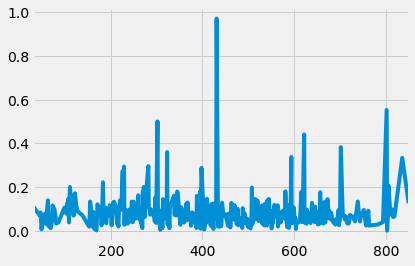

In [466]:
import matplotlib.pyplot as plt

# plt.scatter(df1.group_a,df1.group_b)
df1['incidence'].plot()

In [370]:

def get_event(test_dict):
    try:
        list_values = list(test_dict.values())
        return list_values[0].lower()
    except:
        return np.nan 
    
    
df_event_desc = df_reported_events.applymap(get_event)
list_event = list(map(set,df_event_desc.values))

In [325]:
try_1 = list(map(set,list_event))

In [352]:
flat_list = [item for sublist in list_event for item in sublist]
unique_events = list(set(flat_list))
unique_events = [x for x in unique_events if str(x) != 'nan']

In [371]:
one_hot_encoded_df = pd.get_dummies(df_event_desc, prefix='event')
events = (list(np.unique(one_hot_encoded_df.columns)))

In [411]:
# one_hot_encoded_df.drop_duplicates()
print(len(events))
# one_hot_encoded_df.columns.duplicated()
# one_hot_encoded_df.loc[:,one_hot_encoded_df.columns.duplicated()]
# one_hot_encoded_df[events].drop_duplicates(axis=1)
hot_encoded = one_hot_encoded_df.groupby(one_hot_encoded_df.columns, axis=1).sum()
final_df = df1.join(hot_encoded)

cluster_data = (final_df.iloc[:,2:]).to_numpy()

4909


In [426]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler



In [539]:
final_df

,nct_id,enrollment,incidence,group_a,group_b,event_abasia,event_abdominal abscess,event_abdominal adhesions,event_abdominal discomfort,event_abdominal distension,...,event_wound secretion,event_wound sepsis,event_wrist fracture,event_wrong drug administered,event_wrong technique in drug usage process,event_xeroderma,event_xerophthalmia,event_xerosis,event_yellow skin,event_zygomycosis
30,NCT00063570,73.0,0.114492,0.134104,0.094881,0,0,0,2,2,...,0,0,0,0,0,0,0,0,0,0
45,NCT00083616,185.0,0.069802,0.068638,0.070985,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
47,NCT00089635,203.0,0.083344,0.086559,0.080072,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
48,NCT00089661,252.0,0.046738,0.046819,0.046656,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49,NCT00089674,1468.0,0.006024,0.006431,0.005617,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813,NCT03382912,52.0,0.098035,0.094012,0.102059,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
816,NCT03397394,97.0,0.062520,0.059964,0.065077,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
819,NCT03414047,169.0,0.065877,0.068631,0.063124,0,0,0,4,4,...,0,0,0,0,0,0,0,0,0,0
836,NCT03543358,3.0,0.333333,0.333333,0.333333,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


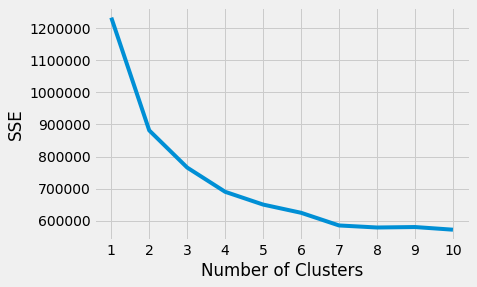

In [526]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(cluster_data)
    sse.append(kmeans.inertia_)

    
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [540]:
kmeans = KMeans(init="random",n_clusters=4,n_init=10,max_iter=300,random_state=42).fit(cluster_data)

df1['cluster'] = kmeans.labels_

In [541]:
df1[df1['cluster']==2]

,nct_id,enrollment,incidence,group_a,group_b,cluster
523,NCT01482715,136.0,0.044758,0.044510,0.045007,2
544,NCT01625286,148.0,0.044732,0.043645,0.045820,2
597,NCT01970865,334.0,0.037371,0.038184,0.036559,2
645,NCT02265510,83.0,0.039873,0.038459,0.041287,2
650,NCT02289690,221.0,0.049077,0.045268,0.052886,2


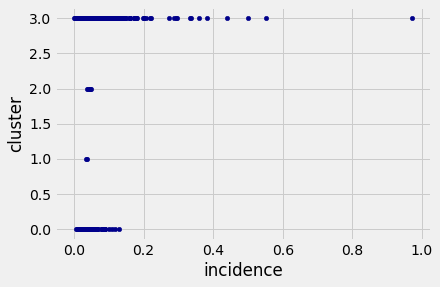

In [542]:
df1.plot.scatter(y='cluster',x='incidence',c='DarkBlue')

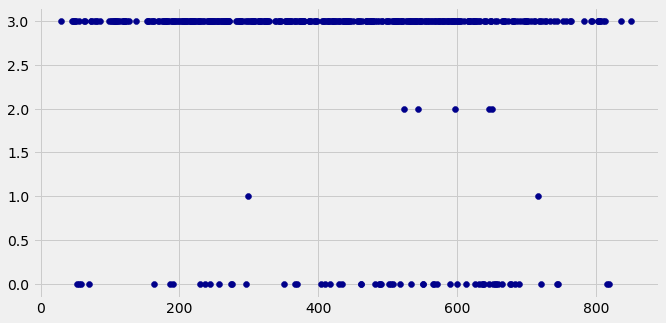

In [543]:

plt.figure(figsize=(10, 5))
plt.scatter(df1.index,df1.cluster,c='DarkBlue')


In [537]:
(hot_encoded.sum().to_frame()).sort_values(by=0,ascending=False).iloc[:25]

,0
event_vomiting,1870
event_nausea,1807
event_diarrhoea,1748
event_pyrexia,1746
event_dyspnoea,1743
event_anaemia,1700
event_fatigue,1589
event_abdominal pain,1584
event_back pain,1548
event_constipation,1530


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


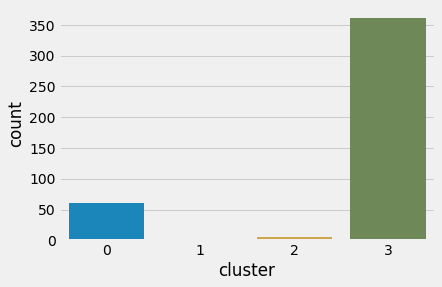

In [544]:
import seaborn as sns
sns.countplot(df1['cluster'])